In [71]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulate AR(1) Time Series

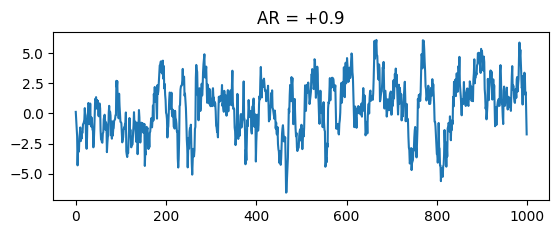

In [72]:
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1,ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.title('AR = +0.9')
plt.plot(simulated_data_1)

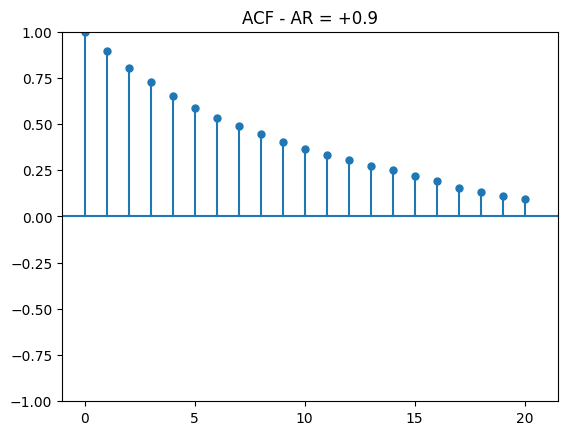

In [73]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)

plt.title('ACF - AR = +0.9')
plt.show()

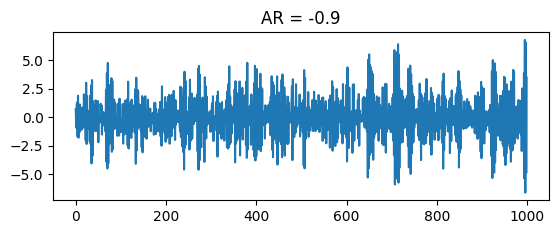

In [74]:
# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.title('AR = -0.9')
plt.show()

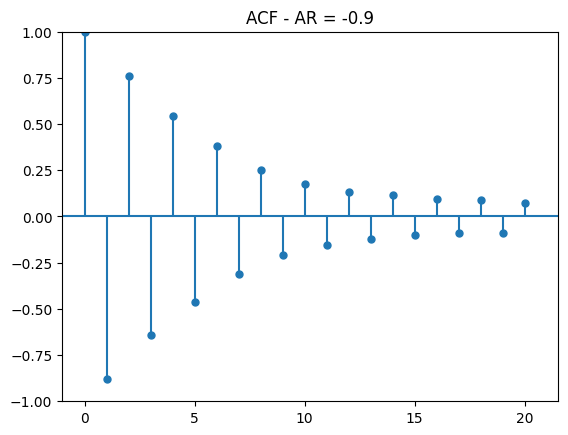

In [75]:
# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.title('ACF - AR = -0.9')
plt.show()


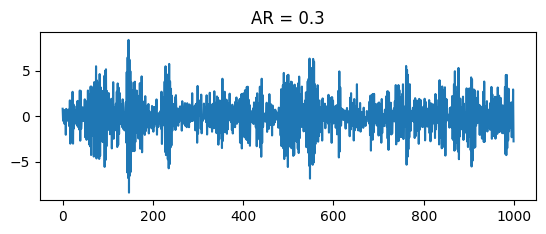

In [76]:
# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.title('AR = 0.3')
plt.show()

# Estimating and Forecasting AR 

In [77]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [78]:
# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0)) # 1 is Order - AR, just autoregressive
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1420.437
Date:                Fri, 20 Jan 2023   AIC                           2846.874
Time:                        19:12:28   BIC                           2861.597
Sample:                             0   HQIC                          2852.470
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4071      0.298      1.366      0.172      -0.177       0.991
ar.L1          0.8937      0.015     60.581      0.000       0.865       0.923
sigma2         1.0014      0.040     25.224      0.0

In [79]:
simulated_data_1 = pd.DataFrame(simulated_data_1)

In [80]:
simulated_data_1

,0
0,0.126298
1,-0.577682
2,-1.121438
3,-1.888877
4,-4.308027
...,...
995,3.081021
996,1.548495
997,1.744764
998,0.001635


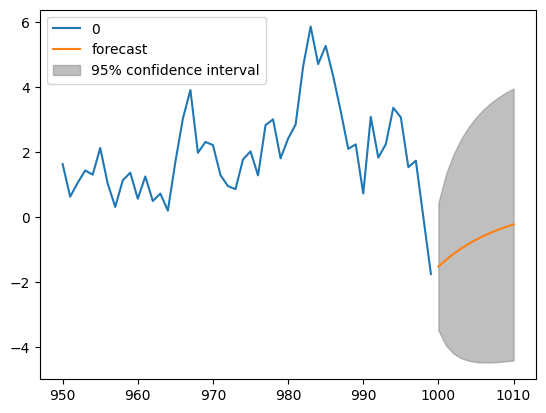

In [81]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

In [82]:
interest_rate_data = np.array([ 3.85,  4.14,  4.21,  4.65,  4.64,  5.7 ,  6.16,  7.88,  6.5 ,
        5.89,  6.41,  6.9 ,  7.4 ,  7.76,  6.81,  7.78,  9.15, 10.33,
       12.43, 13.98, 10.36, 11.82, 11.55,  9.  ,  7.23,  8.83,  9.14,
        7.93,  8.08,  6.71,  6.7 ,  5.83,  7.84,  5.58,  6.43,  5.75,
        4.65,  6.45,  5.12,  5.07,  3.83,  4.27,  4.24,  4.39,  4.71,
        4.04,  2.25,  3.85,  3.3 ,  1.89,  1.78,  3.04,  2.17,  2.27,
        2.45,  2.16])

interest_rate_data = pd.DataFrame(interest_rate_data)

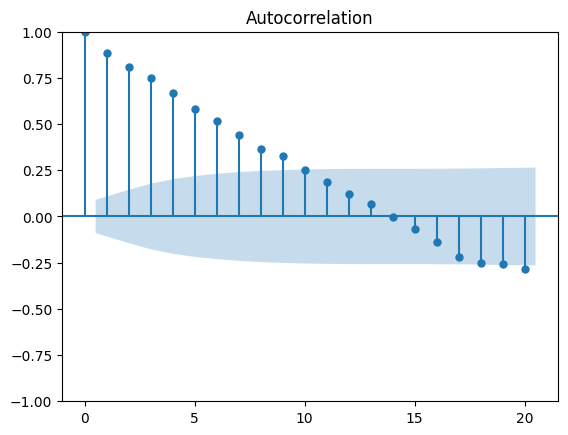

In [83]:
# Plot 1: AR parameter = +0.9
plot_acf(interest_rate_data, alpha=0.5, lags=20);

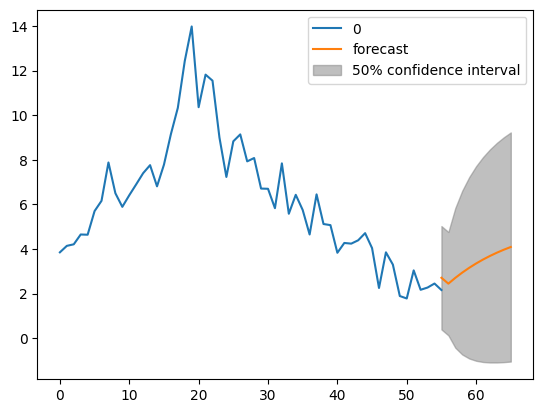

In [84]:
# Forecast interst rates using an AR(1) model
mod = ARIMA(interest_rate_data, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
interest_rate_data.plot(ax=ax)
plot_predict(res, start=55, end=65, alpha=0.5, ax=ax)
plt.show()

In [85]:
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

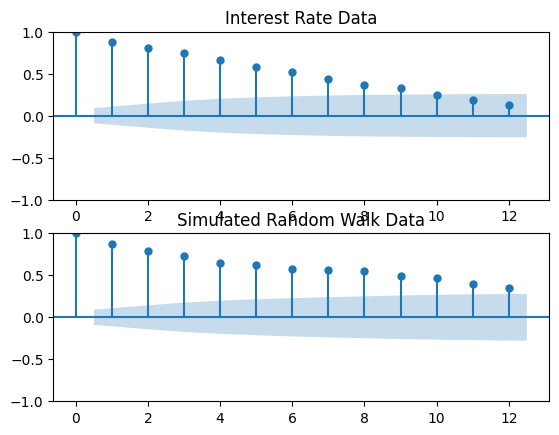

In [86]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=0.5, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=0.5, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

## Choosing best order

Using BIC, lowest BIC value should be the better order to use

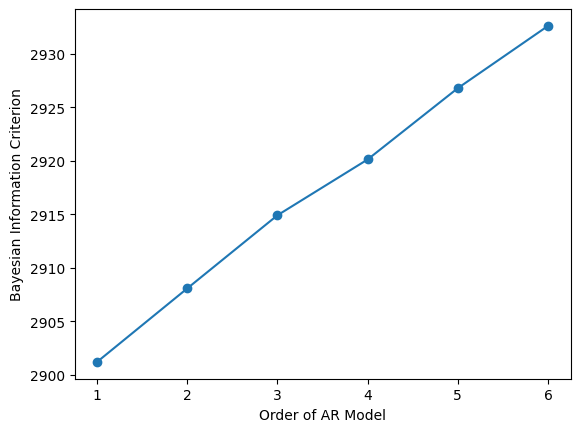

In [87]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()